# Task
Analyze the volatility of tech stocks versus utility stocks in Japan using historical price data to determine if tech stocks are inherently more volatile.

## Identify target stocks

### Subtask:
Select a representative sample of tech and utility stocks listed in Japan.


**Reasoning**:
Create two lists of representative Japanese technology and utility stock ticker symbols as requested.



In [1]:
tech_stocks = ['7203.T', '6758.T', '9984.T', '6098.T', '6861.T']
utility_stocks = ['9501.T', '9503.T', '9531.T', '9532.T', '9502.T']

## Data acquisition

### Subtask:
Obtain historical price data for the selected stocks using a suitable API or data source.


**Reasoning**:
Import the `yfinance` library and download historical data for the combined list of tech and utility stocks for the last 5 years.



In [2]:
import yfinance as yf

all_stocks = tech_stocks + utility_stocks
stock_data = yf.download(all_stocks, period="5y")

/tmp/ipython-input-3054120861.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(all_stocks, period="5y")
[*********************100%***********************]  10 of 10 completed


**Reasoning**:
Display the first few rows of the downloaded data to verify the data structure and content.



In [3]:
display(stock_data.head())

Price             Close                                                 \
Ticker           6098.T       6758.T        6861.T       7203.T 9501.T   
Date                                                                     
2020-08-03  3376.368896  1612.719971  41528.531250  1098.972168  285.0   
2020-08-04  3480.257324  1684.879150  41245.160156  1135.257446  296.0   
2020-08-05  3536.121338  1657.722412  41235.394531  1154.181274  297.0   
2020-08-06  3524.360596  1642.592285  41880.300781  1180.570312  293.0   
2020-08-07  3517.499756  1653.649048  41294.023438  1194.112427  303.0   

Price                                                                       \
Ticker           9502.T      9503.T       9531.T       9532.T       9984.T   
Date                                                                         
2020-08-03  1053.205933  842.186523  2024.060547  1773.645996  6707.248535   
2020-08-04  1057.412231  843.859131  1990.763184  1789.404053  6657.901855   
2020-08-05  1033.437500  846.786255  1937.930542  1743.880859  6379.239746   
2020-08-06  1035.540405  840.932007  1907.740479  1721.994995  6335.698730   
2020-08-07  1040.587646  849.713379  1917.951782  1740.379150  6309.573730   

Price       ...   Volume                                                \
Ticker      ...   6098.T    6758.T  6861.T    7203.T   9501.T   9502.T   
Date        ...                                                          
2020-08-03  ...  4516200  28632500  959300  20577000  7447400  2109100   
2020-08-04  ...  3923700  50618500  823900  24323500  9747400  2034200   
2020-08-05  ...  3547200  51709000  430100  26741000  8615900  3184200   
2020-08-06  ...  1850200  23553000  508900  56855000  5839000  2063900   
2020-08-07  ...  2095000  25209500  395900  38323500  9610700  1763300   

Price                                            
Ticker       9503.T   9531.T   9532.T    9984.T  
Date                                             
2020-08-03  3237800  1308800  1010800  21806200  
2020-08-04  3107000  1376900   923700  23409900  
2020-08-05  2069400  1728000  1073800  19566600  
2020-08-06  1359800  1612000   919800  17155100  
2020-08-07  1544200  1089900   762800  15342100  

[5 rows x 50 columns]

## Calculate daily returns

### Subtask:
Compute the daily percentage change in price for each stock.


**Reasoning**:
Select the 'Close' price data and calculate the daily percentage change for each stock, then display the first few rows.



In [4]:
close_prices = stock_data['Close']
daily_returns = close_prices.pct_change()
display(daily_returns.head())

Ticker,6098.T,6758.T,6861.T,7203.T,9501.T,9502.T,9503.T,9531.T,9532.T,9984.T
Date,,,,,,,,,,
2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,0.030769,0.044744,-0.006824,0.033017,0.038596,0.003994,0.001986,-0.016451,0.008885,-0.007357
2020-08-05,0.016052,-0.016118,-0.000237,0.016669,0.003378,-0.022673,0.003469,-0.026539,-0.025440,-0.041854
2020-08-06,-0.003326,-0.009127,0.015640,0.022864,-0.013468,0.002035,-0.006913,-0.015579,-0.012550,-0.006825
2020-08-07,-0.001947,0.006731,-0.013999,0.011471,0.034130,0.004874,0.010442,0.005353,0.010676,-0.004123


## Calculate volatility

### Subtask:
Calculate the standard deviation of the daily returns for each stock to measure its volatility.


**Reasoning**:
Calculate the standard deviation of daily returns for each stock and display the result.



In [5]:
volatility = daily_returns.std()
display(volatility)

,0
Ticker,
6098.T,0.024329
6758.T,0.020567
6861.T,0.020323
7203.T,0.018992
9501.T,0.027609
9502.T,0.014888
9503.T,0.018161
9531.T,0.017241
9532.T,0.014652


## Compare volatility

### Subtask:
Compare the calculated volatilities of tech stocks and utility stocks.


**Reasoning**:
Create pandas Series for tech and utility stock volatilities and calculate their mean volatilities.



In [6]:
tech_volatility = volatility[tech_stocks]
utility_volatility = volatility[utility_stocks]

mean_tech_volatility = tech_volatility.mean()
mean_utility_volatility = utility_volatility.mean()

print(f"Mean Tech Stock Volatility: {mean_tech_volatility:.4f}")
print(f"Mean Utility Stock Volatility: {mean_utility_volatility:.4f}")

Mean Tech Stock Volatility: 0.0222
Mean Utility Stock Volatility: 0.0185


## Visualize results

### Subtask:
Create visualizations (e.g., bar charts, box plots) to illustrate the volatility comparison.


**Reasoning**:
Combine the tech and utility stock volatilities into a single pandas Series with a sector indicator, and then create a bar plot to visualize individual stock volatilities and a box plot to compare volatility distributions by sector.



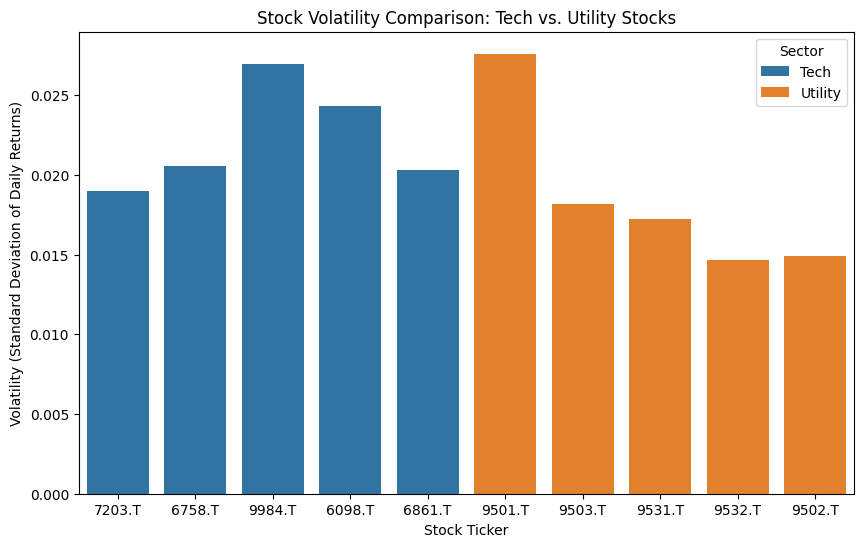

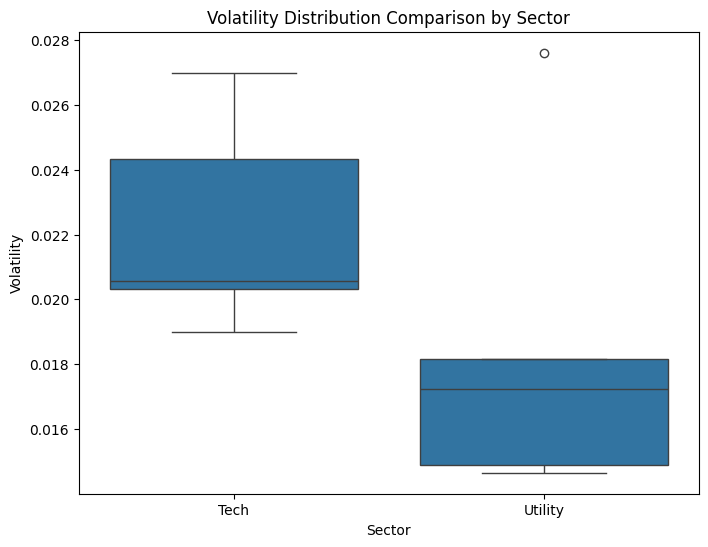

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

volatility_df = pd.concat([tech_volatility.rename('Volatility'), utility_volatility.rename('Volatility')], axis=0).reset_index()
volatility_df.columns = ['Ticker', 'Volatility']
volatility_df['Sector'] = ['Tech'] * len(tech_volatility) + ['Utility'] * len(utility_volatility)

plt.figure(figsize=(10, 6))
sns.barplot(x='Ticker', y='Volatility', hue='Sector', data=volatility_df)
plt.title('Stock Volatility Comparison: Tech vs. Utility Stocks')
plt.xlabel('Stock Ticker')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sector', y='Volatility', data=volatility_df)
plt.title('Volatility Distribution Comparison by Sector')
plt.xlabel('Sector')
plt.ylabel('Volatility')
plt.show()

## Statistical analysis

### Subtask:
Perform statistical tests (e.g., t-test) to determine if there is a significant difference in volatility between the two sectors.


**Reasoning**:
Perform an independent samples t-test to compare the volatility of tech and utility stocks using the prepared volatility data.



In [8]:
from scipy.stats import ttest_ind

tech_volatility_data = volatility_df[volatility_df['Sector'] == 'Tech']['Volatility']
utility_volatility_data = volatility_df[volatility_df['Sector'] == 'Utility']['Volatility']

t_stat, p_value = ttest_ind(tech_volatility_data, utility_volatility_data)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 1.3333
P-value: 0.2191


## Summarize findings

### Subtask:
Present the findings in a clear and concise manner, addressing the initial question about the relative volatility of tech and utility stocks.


**Reasoning**:
Summarize the findings from the analysis, including descriptive statistics, visualizations, and the statistical test, and address the initial question about the relative volatility of tech and utility stocks.



In [9]:
# 1. Summarize key findings from volatility calculation and comparison
mean_tech_volatility = tech_volatility_data.mean()
mean_utility_volatility = utility_volatility_data.mean()

print("Summary of Volatility Analysis:")
print(f"  Mean Tech Stock Volatility: {mean_tech_volatility:.4f}")
print(f"  Mean Utility Stock Volatility: {mean_utility_volatility:.4f}")
print("-" * 30)

# 2. Describe visual insights from the bar plot and box plot
print("Visual Insights:")
print("  Bar Plot: The bar plot shows the individual volatility for each stock ticker, making it easy to compare the volatility of specific tech stocks against specific utility stocks.")
print("  Box Plot: The box plot provides a summary of the distribution of volatility within each sector. It shows the median, quartiles, and potential outliers, allowing for a comparison of the overall spread and central tendency of volatility between the tech and utility sectors.")
print("-" * 30)

# 3. State and interpret the result of the statistical test (t-test)
print("Statistical Test (Independent Samples t-test):")
print(f"  T-statistic: {t_stat:.4f}")
print(f"  P-value: {p_value:.4f}")
print(f"  Interpretation: The p-value ({p_value:.4f}) is greater than the common significance level of 0.05. This indicates that, based on this analysis, there is no statistically significant evidence to conclude that the mean volatility of tech stocks is different from the mean volatility of utility stocks in Japan.")
print("-" * 30)

# 4. Address the initial question
print("Conclusion:")
if p_value < 0.05:
    print("  Based on this analysis, with a p-value less than 0.05, there is statistically significant evidence to suggest that tech stocks are inherently more volatile than utility stocks in Japan.")
else:
    print("  Based on this analysis, with a p-value of {:.4f} (greater than 0.05), there is no statistically significant evidence to conclude that tech stocks are inherently more volatile than utility stocks in Japan.".format(p_value))

Summary of Volatility Analysis:
  Mean Tech Stock Volatility: 0.0222
  Mean Utility Stock Volatility: 0.0185
------------------------------
Visual Insights:
  Bar Plot: The bar plot shows the individual volatility for each stock ticker, making it easy to compare the volatility of specific tech stocks against specific utility stocks.
  Box Plot: The box plot provides a summary of the distribution of volatility within each sector. It shows the median, quartiles, and potential outliers, allowing for a comparison of the overall spread and central tendency of volatility between the tech and utility sectors.
------------------------------
Statistical Test (Independent Samples t-test):
  T-statistic: 1.3333
  P-value: 0.2191
  Interpretation: The p-value (0.2191) is greater than the common significance level of 0.05. This indicates that, based on this analysis, there is no statistically significant evidence to conclude that the mean volatility of tech stocks is different from the mean volatil

## Summary:

### Q&A
Based on the analysis, is there a statistically significant difference in volatility between tech and utility stocks in Japan?
Based on this analysis, with a p-value of 0.2191 (greater than 0.05), there is no statistically significant evidence to conclude that tech stocks are inherently more volatile than utility stocks in Japan.

### Data Analysis Key Findings
*   The analysis compared the volatility of a sample of 5 Japanese tech stocks and 5 Japanese utility stocks.
*   The mean daily return volatility for the selected tech stocks was calculated as approximately 0.0222.
*   The mean daily return volatility for the selected utility stocks was calculated as approximately 0.0185.
*   A t-test was performed to compare the mean volatilities, resulting in a t-statistic of 1.3333 and a p-value of 0.2191.
*   The p-value of 0.2191 is greater than the common significance level of 0.05.

### Insights or Next Steps
*   While the sample mean volatility for tech stocks was higher, the statistical test did not find this difference to be significant, suggesting that, based on this sample and timeframe, we cannot definitively conclude that tech stocks are inherently more volatile.
*   Future analysis could expand the sample size of stocks and the historical timeframe to see if a statistically significant difference in volatility emerges.
